In [ ]:
#pip install matplotlib-venn

In [1]:
from datetime import datetime
Início_dos_trabalhos = datetime.now()
print('Início em: ', Início_dos_trabalhos)

from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from Carga import Carga
from Database import Database
from pandas import pandas as pd


Início em:  2023-04-13 10:02:54.975010


In [7]:

db = Database('CNPq')
engine = Carga.db_engine()
dt = pd.read_sql("""
select * from financiamentos_doutorandos_2014
	inner join all_lattes
		on all_lattes.id = financiamentos_doutorandos_2014.id
where all_lattes.dt_atualizacao > '01/01/2020'""", engine)
print(f'dt.size: {dt.size}')

print('Término em: ', datetime.now())

dt.size: 233750
Término em:  2023-04-13 10:03:49.749691


In [12]:
dt['cnpq'] = dt.apply(lambda row: True if row['pagtos']>0 else False, axis=1)

In [34]:
num_cnpq = len(dt.loc[dt['cnpq'] == True].loc[dt['capes'] == False])
num_capes = len(dt.loc[dt['cnpq'] == False].loc[dt['capes'] == True])
num_nenhum = len(dt.loc[dt['cnpq'] == False].loc[dt['capes'] == False])
num_capes_cnpq = len(dt.loc[dt['cnpq'] == True].loc[dt['capes'] == True])
total = len(dt)

Total:  21250


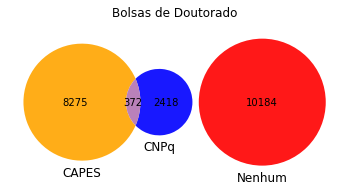

In [35]:
 
# depict venn diagram
venn3(subsets=(num_capes, num_cnpq, num_capes_cnpq, num_nenhum, 0, 0, 0), 
      set_labels=('CAPES', 'CNPq', 'Nenhum'), 
      set_colors=("orange", "blue", "red"), alpha=0.9)
  
# outline of circle line style and width
#venn3_circles(subsets=(8536, 2452, 416, 10446, 0, 0, 0),
#              linestyle="dashed", linewidth=1, alpha=0.9)
  
# title of the venn diagram
#fig, ax = plt.subplots()
plt.title("Bolsas de Doutorado")
#plt.figure(figsize=(60,60))
#plt.savefig('Diagrama de Venn - Financiamento a Doutorandos 2014.eps', format='eps')
#plt.savefig('Diagrama de Venn - Financiamento a Doutorandos 2014.svg', format='svg', dpi=600)
plt.savefig('Diagrama de Venn - Financiamento a Doutorandos 2014.png', format='png', dpi=600)
#plt.savefig('Diagrama de Venn - Financiamento a Doutorandos 2014.jpg', format='jpg', dpi=600)
#plt.show()
print('Total: ', total)
